# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Necessary Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

<a id='questions'></a>

### Questions

1. Do highly budget movies have a strong correlation with their revenues ?
2. What are the movies' genre distribution ?
3. What is the most popluar movie & its genres ?
4. What are the features associated with popular movie ?
5. Do movies after 2010 have more popularity than movies before 2010 ?
6. Is there any correlation between vote_count & movie releasing_data ?
7. What is the original_language feature distribution
8. What is the highest rated/revenue movie ?

<a id='wrangling'></a>
## Data Wrangling

### Data Loading & General Properties

In [3]:
df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_credits = pd.read_csv('tmdb_5000_credits.csv')
df_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
df_credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [5]:
df_movies.shape

(4803, 20)

### Assessing Data

In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
df_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
df_movies.duplicated().sum()

0

- Data has no duplication

In [9]:
df_movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

- Only 5 columns that have NaN Values

In [9]:
df_movies.genres.unique()

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]',
       '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]',
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]'],
      dtype=object)

In [10]:
df_movies.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [11]:
df_movies.production_companies.unique()

array(['[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]',
       '[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Jerry Bruckheimer Films", "id": 130}, {"name": "Second Mate Productions", "id": 19936}]',
       '[{"name": "Columbia Pictures", "id": 5}, {"name": "Danjaq", "id": 10761}, {"name": "B24", "id": 69434}]',
       ...,
       '[{"name": "Asylum Films", "id": 10571}, {"name": "FM Entertainment", "id": 26598}, {"name": "Eagle Eye Films Inc.", "id": 40739}]',
       '[{"name": "Front Street Pictures", "id": 3958}, {"name": "Muse Entertainment Enterprises", "id": 6438}]',
       '[{"name": "rusty bear entertainment", "id": 87986}, {"name": "lucky crow films", "id": 87987}]'],
      dtype=object)

### Data Cleaning

#### Removing(dropping) non questionable columns

In [10]:
dropping_cols = ['homepage', 'title', 'tagline', 'overview', 'keywords', 
                 'production_companies', 'production_countries', 'spoken_languages']
df_reduced_cols = df_movies.drop(columns=dropping_cols, axis=1, inplace=False)
df_reduced_cols.head(1)

,budget,genres,id,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800


#### Dropping null values ( null values only exist at 'release_data' & 'runtime' columns)

In [11]:
df_cleaned = df_reduced_cols.dropna()
print(df_cleaned.isna().sum())
print(df_cleaned.duplicated().sum())

budget               0
genres               0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
vote_average         0
vote_count           0
dtype: int64
0


#### Converting genres column from json like object to a list of strings to be easily manipulated

In [12]:
import ast
df_cleaned['genres'] = df_cleaned['genres'].apply(ast.literal_eval);

<ipython-input-12-8b4956487ef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['genres'] = df_cleaned['genres'].apply(ast.literal_eval);


In [13]:
new_genre_col = []
for row_genre_list in df_cleaned.genres:
    genre_per_row = ""
    for sample_row in row_genre_list:
        genre_per_row += sample_row['name'] + ","
    genre_per_row = genre_per_row.rstrip(',').lower()
    new_genre_col.append(genre_per_row)

In [14]:
df_cleaned['genres'] = new_genre_col

<ipython-input-14-93b23e085413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['genres'] = new_genre_col


In [15]:
df_cleaned.head(1)

,budget,genres,id,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,"action,adventure,fantasy,science fiction",19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800


#### Extracting the unique genres & its repetition

In [16]:
unique_genres = {}
for genre in df_cleaned['genres'].unique():
    try:
        genre_list = genre.split(',')
        for element in genre_list:
            if str(element) in unique_genres.keys():
                unique_genres[str(element)] = unique_genres[str(element)] + 1
            else:
                unique_genres[str(element)] = 0
    except:
        pass

unique_genres.pop('', None)
unique_genres

{'action': 445,
 'adventure': 373,
 'fantasy': 255,
 'science fiction': 257,
 'crime': 237,
 'drama': 506,
 'thriller': 386,
 'animation': 123,
 'family': 230,
 'western': 52,
 'comedy': 413,
 'romance': 230,
 'horror': 172,
 'mystery': 161,
 'history': 89,
 'war': 72,
 'music': 83,
 'documentary': 22,
 'foreign': 21,
 'tv movie': 7}

<a id='eda'></a>
## Exploratory Data Analysis


### 1. Do highly budget movies have a strong correlation with their revenues ?

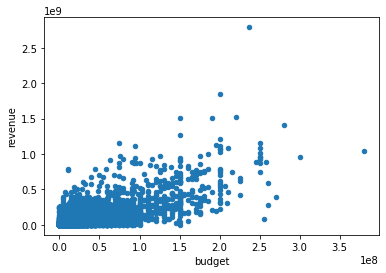

In [17]:
df_cleaned.plot(x='budget', y='revenue', kind='scatter');

### 2. What are the movies' genre distribution ?

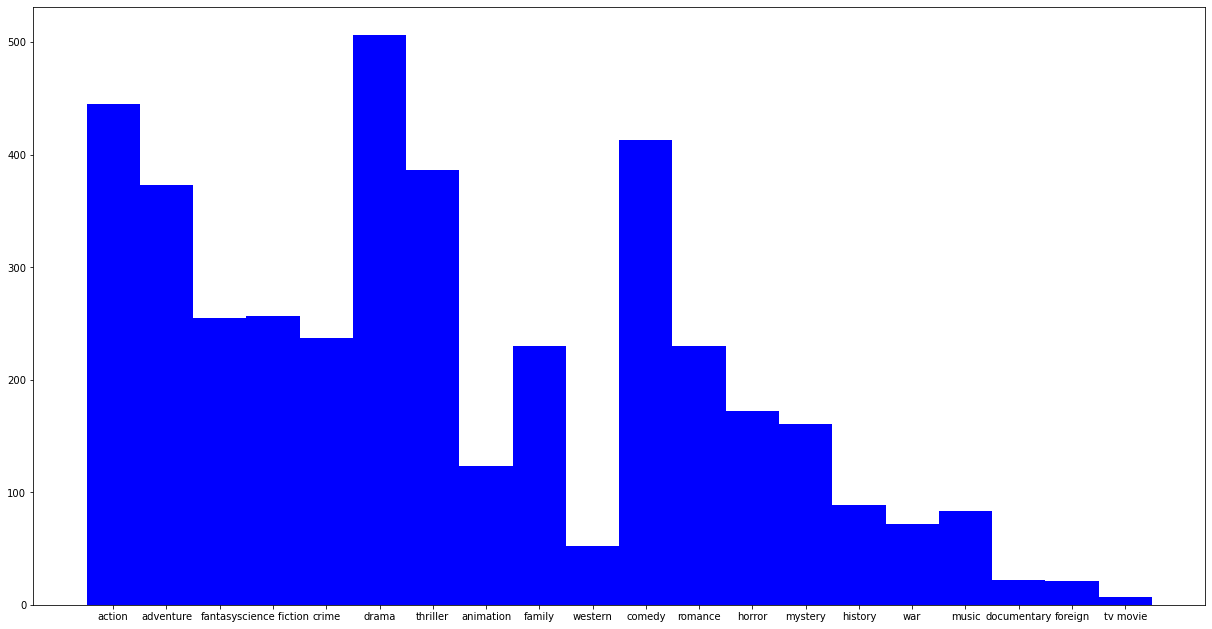

In [18]:
fig = plt.figure(figsize=(21,11))
plt.bar(list(unique_genres.keys()), unique_genres.values(), width=1, color='b');

### 3. What is the most popluar movie & its genres ?

In [19]:
most_popular_movie = df_cleaned[df_cleaned.popularity == df_cleaned.popularity.max()]
most_popular_movie

,budget,genres,id,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
546,74000000,"family,animation,adventure,comedy",211672,en,Minions,875.581305,2015-06-17,1156730962,91.0,Released,6.4,4571


### 4. What are the features associated with a popular movie ?

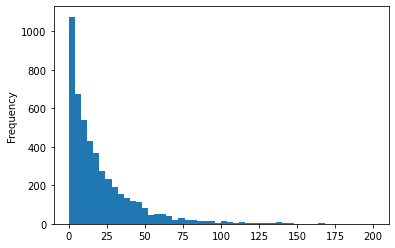

In [20]:
df_cleaned.popularity.plot(kind='hist', bins=50, range=[0, 200]);

<AxesSubplot:>

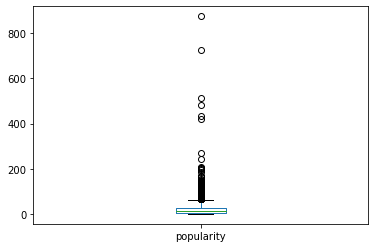

In [21]:
df_cleaned.popularity.plot.box()

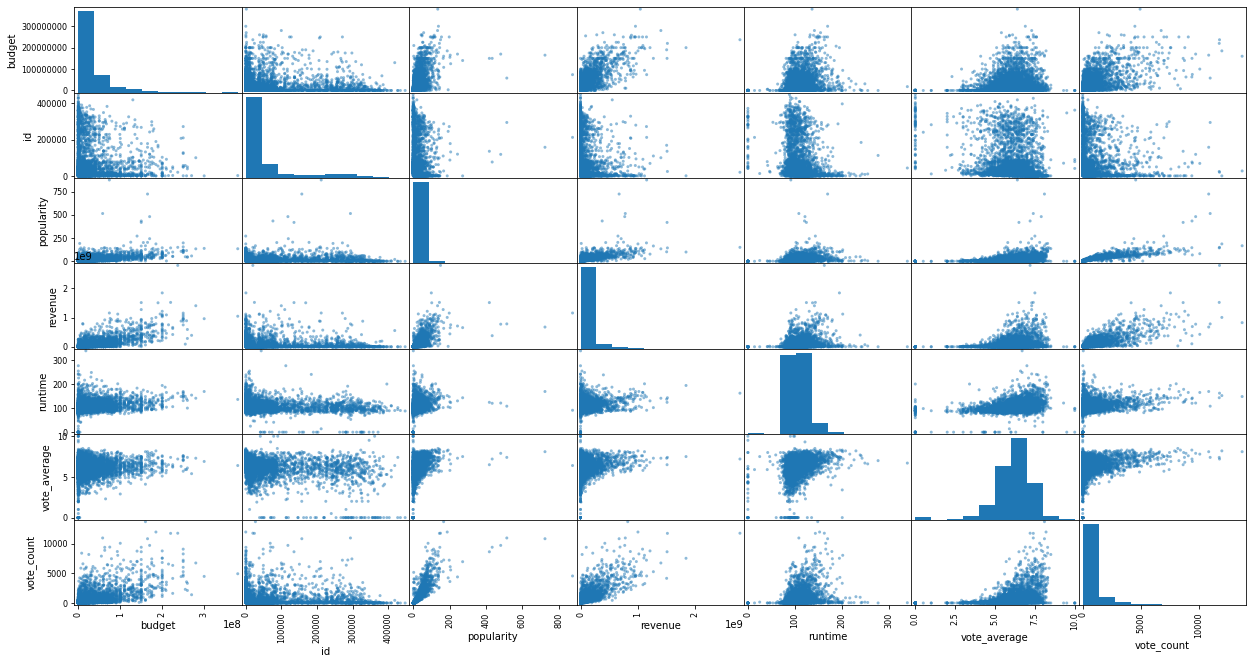

In [22]:
pd.plotting.scatter_matrix(df_cleaned, figsize=(21,11));

### 5. Do movies after 2010 have more popularity than movies before 2010 ?

### 6. Is there any correlation between vote_count & movie releasing_data ?

In [23]:
movies_before = df_cleaned[df_cleaned.release_date < '2009-12-31']
movies_after = df_cleaned.drop(movies_before.index)

In [24]:
movies_before.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.356000e+03,3356.000000,3356.000000,3.356000e+03,3356.000000,3356.000000,3356.000000
mean,2.671985e+07,16035.196663,18.144621,7.309967e+07,108.128725,6.195292,563.494041
std,3.525357e+07,26170.445950,20.629716,1.438308e+08,22.320310,1.064099,1035.082083
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,7.950000e+05,4250.250000,4.577571,0.000000e+00,94.000000,5.700000,53.000000
50%,1.480000e+07,10464.500000,11.585337,1.855827e+07,104.000000,6.300000,202.500000
75%,4.000000e+07,16642.250000,24.109491,8.477604e+07,119.000000,6.900000,588.500000
max,3.000000e+08,426067.000000,271.972889,2.787965e+09,276.000000,10.000000,12002.000000


In [25]:
movies_after.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.444000e+03,1444.000000,1444.000000,1.444000e+03,1444.000000,1444.000000,1444.000000
mean,3.449896e+07,152036.797784,29.316748,1.037226e+08,104.038089,5.860111,986.162742
std,5.084590e+07,106735.901809,47.863972,1.987274e+08,22.865889,1.409035,1566.920846
min,0.000000e+00,189.000000,0.005883,0.000000e+00,0.000000,0.000000,0.000000
25%,8.375000e+05,59715.500000,5.100398,0.000000e+00,92.000000,5.400000,55.000000
50%,1.500000e+07,112943.000000,17.741694,2.157944e+07,102.000000,6.100000,373.500000
75%,4.000000e+07,245738.750000,38.700351,1.119249e+08,115.000000,6.700000,1211.500000
max,3.800000e+08,447027.000000,875.581305,1.519558e+09,338.000000,10.000000,13752.000000


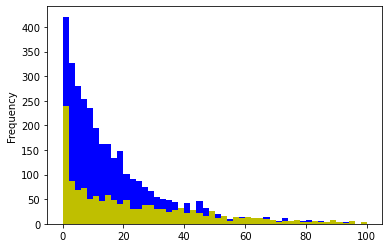

In [131]:
movies_before.popularity.plot(kind='hist', bins=50, range=[0, 100], color='b');
movies_after.popularity.plot(kind='hist', bins=50, range=[0, 100], color='y');

### 7. What is the original_language feature distribution

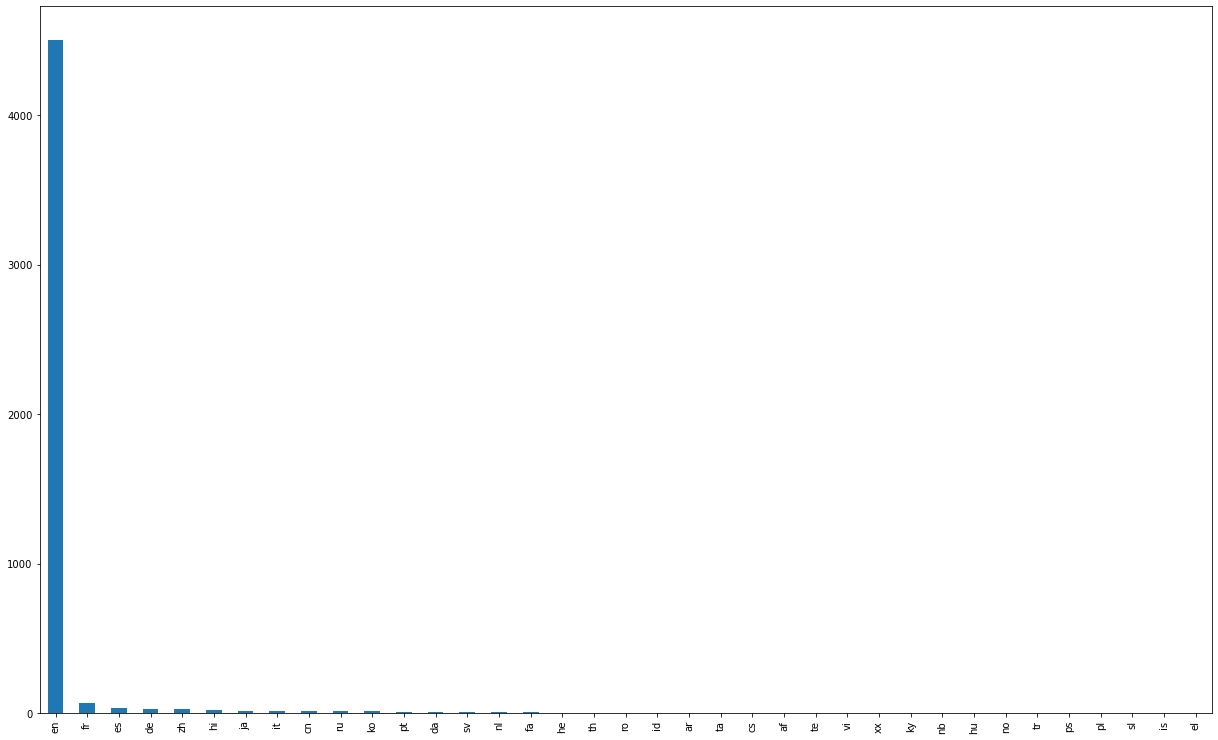

In [43]:
df_cleaned['original_language'].value_counts().plot(kind='bar', figsize=(21,13));

### 8. What is the highest rated/revenue movie ?


In [53]:
most_rated = df_cleaned[(df_cleaned.vote_average > 7 ) & (df_cleaned.vote_count == df_cleaned.vote_count.max())]
most_rated

,budget,genres,id,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
96,160000000,"action,thriller,science fiction,mystery,adventure",27205,en,Inception,167.58371,2010-07-14,825532764,148.0,Released,8.1,13752


In [46]:
highest_revenue = df_cleaned[df_cleaned.revenue == df_cleaned.revenue.max()]
highest_revenue

,budget,genres,id,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,"action,adventure,fantasy,science fiction",19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800


<a id='conclusions'></a>
## Conclusions


#### 1. Do highly budget movies have a strong correlation with their revenues ?
- Yes there's a slightly positive correlation between highly budget movies and highly revenues' movies

#### 2. What are the movies' genre distribution ?
- Drama, comedy & action movies are the most genres repeated

#### 3. What is the most popluar movie & its genres ?
- Minions is the most popular movie with popularity = 875.581305 

#### 4. What are the features associated with popular movie ?
- Popular movies have a slightly positive correlation with (budget, revenue & vote_count)

#### 5. Do movies after 2010 have more popularity than movies before 2010 ?
#### 6. Is there any correlation between vote_count & movie releasing_data ?
- Movies before 2010 have:
    1. Lower average popularity than after 2010
    2. Lower average vote_counts than after 2010
    3. Higher average vote_rate than after 2010
    
#### 7. What is the original_language feature distribution ?
- Movies with english as original lang. is the most movies exists in the dataset with 93% of the total movies  

#### 8. What is the highest rated/revenue movie ?
- Most rated movie with the most vote counts is **Inception**
- Most revenue movie is avatar